In [1]:
import sys
import os
import numpy as np
module_path = os.path.abspath(os.path.joixn('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src/agent_based_sim")
from multi_agent_sim import MultiAgentSim

In [5]:
def init_sim(gamma):
    return MultiAgentSim(n_agents=1000, init_infection_p = 0.001, record_dataset=True, contact_tracing_recall_rate=0.5,
                   use_norm_over_innerprod=True, agent_dimensionality=2, normalize_agent_vector=False,
                   use_testing=False, deterministic_agent_count=True, network_gamma=gamma)

In [3]:
sim.sample_contacts(1)

array([770, 792, 379])

In [4]:
sim.sample_contacts(1)

array([ 64, 431, 384, 197, 962, 868, 361, 213, 307, 237, 712, 372])

In [15]:
agent_id = randint(0,999)
contact_set1 = set(sim.sample_contacts(agent_id))
contact_set2 = set(sim.sample_contacts(agent_id))
len(contact_set1.intersection(contact_set2)) / len(contact_set1.union(contact_set2))

ZeroDivisionError: division by zero

In [19]:
from random import randint
gamma_vals = list(range(21))
avg_jaccards = []
for gamma in gamma_vals:
    jaccards = []
    for _ in range(10):
        sim = init_sim(gamma)

        for _ in range(1000):
            agent_id = randint(0,999)
            contact_set1 = set(sim.sample_contacts(agent_id))
            contact_set2 = set(sim.sample_contacts(agent_id))
            if len(contact_set1.union(contact_set2)) > 0:
                jaccards.append(len(contact_set1.intersection(contact_set2)) / len(contact_set1.union(contact_set2)))
    avg_jaccards.append(np.mean(jaccards))
    print("done gamma {}".format(gamma))

done gamma 0
done gamma 1
done gamma 2
done gamma 3
done gamma 4
done gamma 5
done gamma 6
done gamma 7
done gamma 8
done gamma 9
done gamma 10
done gamma 11
done gamma 12
done gamma 13
done gamma 14
done gamma 15
done gamma 16
done gamma 17
done gamma 18
done gamma 19
done gamma 20


Text(0,0.5,'Average Jaccard Similarity for Independent Samples')

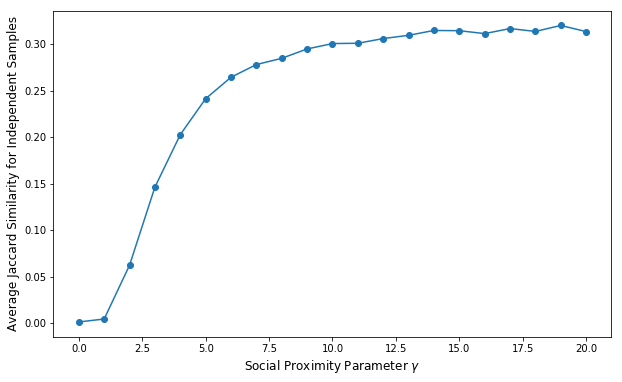

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(gamma_vals, avg_jaccards, marker='o')
plt.xlabel("Social Proximity Parameter $\gamma$", fontsize=12)
plt.ylabel("Average Jaccard Similarity for Independent Samples", fontsize=12)

In [21]:
jaccards = []
for _ in range(10):
    sim = init_sim(100)

    for _ in range(1000):
        agent_id = randint(0,999)
        contact_set1 = set(sim.sample_contacts(agent_id))
        contact_set2 = set(sim.sample_contacts(agent_id))
        if len(contact_set1.union(contact_set2)) > 0:
            jaccards.append(len(contact_set1.intersection(contact_set2)) / len(contact_set1.union(contact_set2)))

/home/jmc678/covid_data/group-testing/src/agent_based_sim/multi_agent_sim.py:66: RuntimeWarning: overflow encountered in double_scalars
  for j in self.agents] for i in self.agents])
/home/jmc678/covid_data/group-testing/src/agent_based_sim/multi_agent_sim.py:115: RuntimeWarning: invalid value encountered in true_divide
  probability_vec = inner_product_vec / normalizer


ValueError: probabilities contain NaN

In [4]:
sim.agent_similarities[1,3]

1.0

In [5]:
sim2 = MultiAgentSim(n_agents=1000, init_infection_p = 0.001, record_dataset=True, contact_tracing_recall_rate=0.5,
                   use_norm_over_innerprod=True, agent_dimensionality=2, normalize_agent_vector=False,
                   use_testing=False, deterministic_agent_count=True, network_gamma=16)

In [6]:
sim2.agent_similarities[1,3]

52.01005245808473

In [7]:
sim2.agent_similarities[1,4]

8.59068087333038e+22